In [ ]:
import numpy as np                                                  # importing numpy library
import pandas as pd                                                 # importing pandas library
from scipy.stats import fisher_exact                                # importing scipy.stats library for Fisher's Exact Test
import csv

#Loading the data

In [ ]:

  dataset=pd.read_csv("path")
  dataset.head(10)

,SNP,Case_Num_C_Allele,Case_Num_T_Allele,Control_Num_C_Allele,Control_Num_T_Allele
0,snp0,19,31,96,4
1,snp1,43,7,82,18
2,snp2,21,29,95,5
3,snp3,22,28,4,96
4,snp4,36,14,30,70
5,snp5,30,20,98,2
6,snp6,29,21,8,92
7,snp7,42,8,8,92
8,snp8,42,8,92,8
9,snp9,8,42,55,45


# **Fisher's Exact Test**

In [ ]:
result_SNP ,result_P_value, result_significant_SNP ,count=[],[],[],0
    effective_p_value=5*10**(-8)
    for index in dataset.index:
      c_case,c_control=dataset['Case_Num_C_Allele'][index] , dataset['Control_Num_C_Allele'][index]
      t_case,t_control=dataset['Case_Num_T_Allele'][index] , dataset['Control_Num_T_Allele'][index]
      table= np.array([[c_case, t_case], [c_control, t_control]])
      oddscore, p = fisher_exact(table, alternative='greater')
      result_SNP.append(dataset['SNP'][index])
      result_P_value.append(p)
      if p>effective_p_value:
        result_significant_SNP.append('flase')
      if p<effective_p_value:
        result_significant_SNP.append('true')
        count=count+1
    print('significant SNPs with given effective P value is',count)

# **Bonferroni-corrected p-values**

In [ ]:
# finding the Bonferroni corrected P value
result_corrected_P_value=[]                                            # list created to store the data of SNP's that are significant under corrected effective p value
number_of_tests_performed=1000                                       # 1000 SNPS, so each SNP will have one Test , so 1000 tests
count2=0                                                               # this variable is created to store the Significant SNPs under corrected P value
corrected_p_value=effective_p_value/number_of_tests_performed
for i in result_P_value:
  if i <corrected_p_value:
    result_corrected_P_value.append('true')                            # if the P value is lessthan corrected effective p value , represent with true
    count2=count2+1
  else:
    result_corrected_P_value.append('false')                           # if the p value is greater than corrected effective p value ,given false
print('significant SNPs with corrected P value is',count2)
print(corrected_p_value)

significant SNPs with corrected P value is 110
4.9999999999999995e-11


In [ ]:
#converting the SNP list , P value list , Significant p value list into a dataframe
new_dataframe=pd.DataFrame({'P_value':result_P_value,'significant_P_value':result_significant_SNP,'corrected_P_value':result_corrected_P_value})

In [ ]:

# downloading the dataframe as a CSV file with a name result.csv

from google.colab import files

new_dataframe.to_csv('result.csv', encoding = 'utf-8-sig',index=False)
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Manhattan Plots**

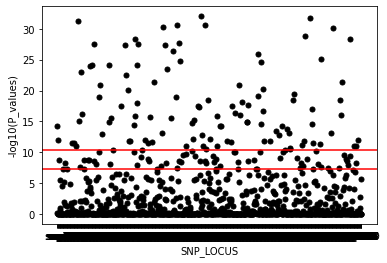

In [ ]:
import matplotlib.pyplot as plt                                  # importing library to plot graph
import math                                                      # import math library to get log values
log_values=[]                                                    # created list to store the log values
lg_effective_P_value=-(math.log10(effective_p_value))            # finding the log value for the effective p value
lg_corrected_P_value=-(math.log10(corrected_p_value))            # finding the log value for the corrected p value
for i in result_P_value:
  a=-(math.log10(i))
  log_values.append(a)                                           # finding the log values for all P values
SNP_Locus=result_SNP                                             # assigning the X axis values
plt.scatter(SNP_Locus,log_values, color='k',s=25,marker='o')     # ploting the graph
plt.xlabel('SNP_LOCUS')                                          # giving x label
plt.ylabel('-log10(P_values)')                                   # giving y label
plt.axhline(lg_corrected_P_value,color='r')                      # drwaing the log corrected p value line
plt.axhline(lg_effective_P_value,color='r')                      # drwaing the log effective p value line
plt.legend
plt.show()                                                       # showing the final plot
